# Facial Recognition with Support Vector Machines
This dataset is a collection of JPEG pictures of famous people collected over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

The purpose in this project is to recognize the face of person in the picture and label it with its full name, based on a training process composed by thousand of labeled pictures. 

For this project, all picture are black & white (sklearn.datasets.fetch_lfw_people
-- parameter color = False)

Finally, for this project each class in dataset has at least 60 values.

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [4]:
faces.images.shape

(1348, 62, 47)

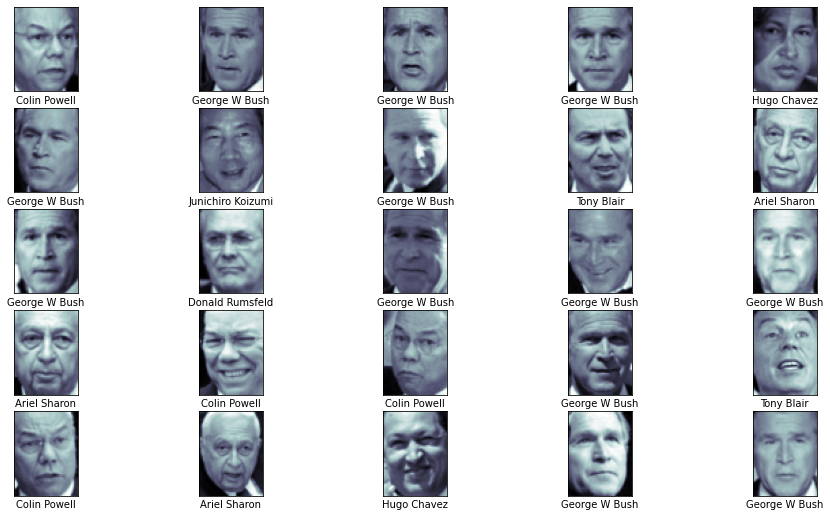

In [5]:
fig, ax = plt.subplots(5,5,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i],cmap="bone")
    ax_i.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])


In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [7]:
pca = RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel="rbf",class_weight="balanced")
model = make_pipeline(pca,svc)

Each picture is a 62x47 pixels: 2914

To compute a dataset of 2914 features will demand too many resources. To solve this, it is posible to reduce dimensionality using Principal Components Analysis.

Doing this, the dataset will be transformed to a n_components-features. These transformed features give the highest amount of variance explained of the original dataset.

In this case, n_components value is 150

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# El dataset está en faces.data y faces.target
X_train, X_test, Y_train, Y_test = train_test_split(faces.data,faces.target,random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV

### Best C and gamma parameters for kernel radial (rbf) 

In [11]:
param_grid = {"svc__gamma" : [0.0001,0.001,0.01,0.1],"svc__C":[0.01,0.1,1,10,100,200,300]}
grid = GridSearchCV(model,param_grid)
%time grid.fit(X_train,Y_train)

CPU times: user 2min, sys: 1min 2s, total: 3min 3s
Wall time: 1min 51s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [12]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'svc', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

#### Best values for C and gamma

In [13]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [14]:
estimator = grid.best_estimator_
yfit = estimator.predict(X_test)

Text(0.5, 0.98, 'Predictions (mistakes in red)')

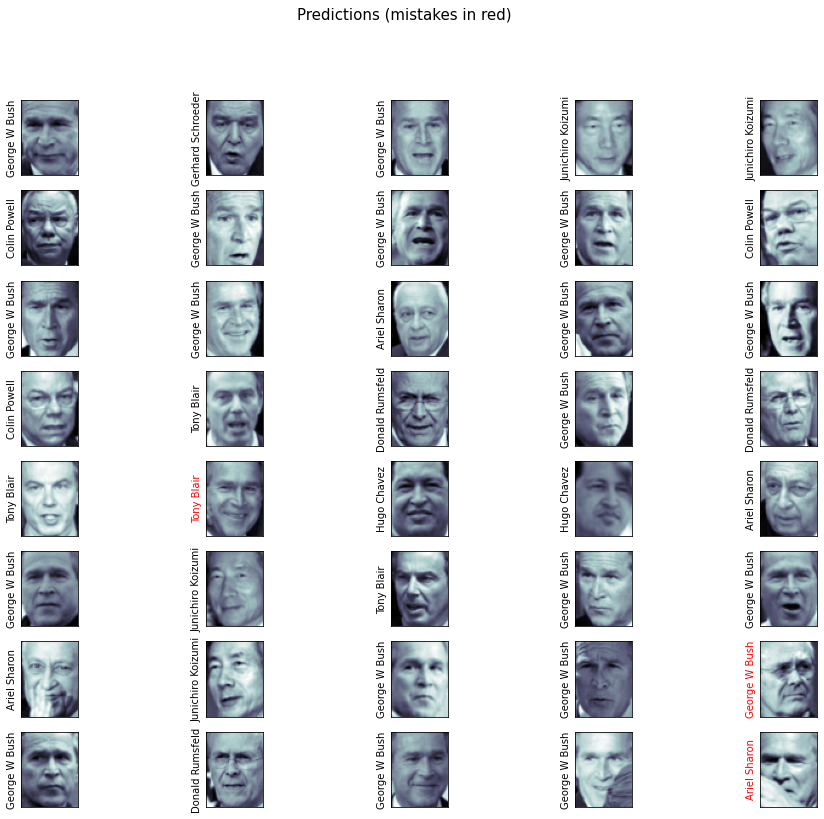

In [18]:
fig, ax = plt.subplots(8,5, figsize=(16,13))
for i,ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47),cmap="bone")
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]],color = "black" 
                                       if faces.target_names[yfit[i]]== faces.target_names[Y_test[i]]
                                       else "red")
fig.suptitle("Predictions (mistakes in red)",size=15)
    

### Classifying report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,yfit,target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,yfit)

array([[ 11,   1,   2,   1,   0,   0,   0,   0],
       [  2,  59,   2,   3,   0,   0,   0,   2],
       [  1,   2,  26,   1,   0,   0,   0,   1],
       [  2,  11,   3, 105,   2,   1,   0,   2],
       [  0,   0,   1,   1,  19,   0,   1,   1],
       [  1,   1,   0,   2,   1,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   1,   1,   0,   0,   0,  40]])